In [36]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout,Flatten,MaxPooling2D
from tqdm.notebook import tqdm
import os
import pandas as pd
import numpy as np

In [20]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [21]:
def createdataframe(dir):
    image_paths=[]
    labels=[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels


In [22]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [23]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [24]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [25]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [26]:

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode = "grayscale" )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [27]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [28]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [29]:
X_train = train_features/255.0
X_test = test_features/255.0

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [31]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [32]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [33]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy')

In [35]:
model.fit(x=X_train , y=y_train,batch_size=128,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
 37/226 ━━━━━━━━━━━━━━━━━━━━ 1:50 583ms/step - loss: 1.8694

KeyboardInterrupt: 

In [ ]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [ ]:

def ef(image):
    img = load_img(image, color_mode = "grayscale")
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [ ]:
import pickle
pickle.dump(model, open('artifacts/model.pkl','wb'))

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
model prediction is  sad


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
model prediction is  happy


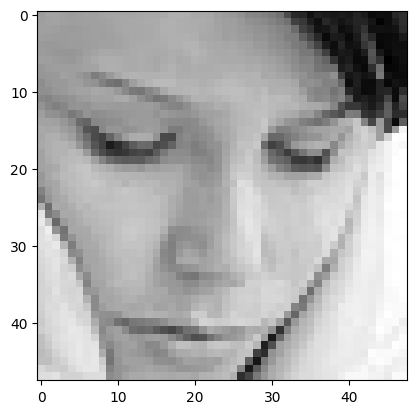

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
model prediction is  sad


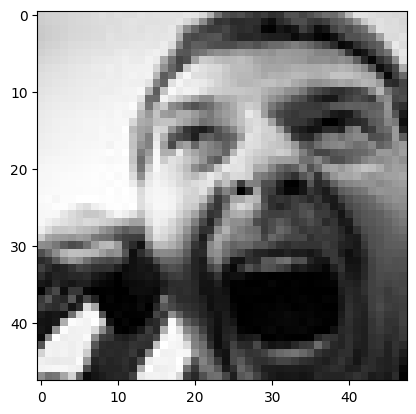

In [ ]:
image = 'images/train/angry/43.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
model prediction is of happy


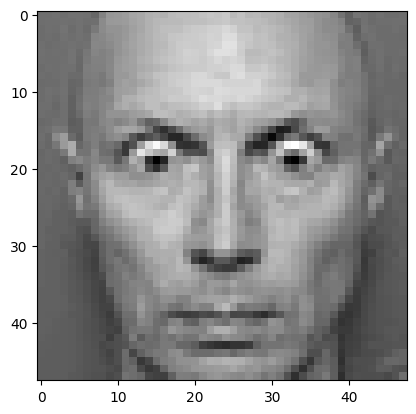

In [ ]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is of",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
model prediction is  happy


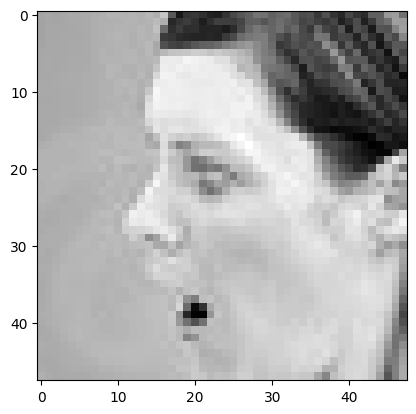

In [ ]:
image = 'images/train/surprise/128.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')